# Boosting Techniques

1. What is Boosting in Machine Learning? Explain how it improves weak
learners?
   - Boosting is an ensemble learning technique that combines multiple weak learners to create a strong predictive model. It works by training models sequentially, where each new model focuses more on the errors made by the previous ones.

2. What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
   - **AdaBoost:** AdaBoost trains models by reweighting training samples, giving more importance to misclassified data points in each iteration. Each model focuses on correcting the mistakes of the previous one by adjusting sample weights.

      **Gradient Boosting:** Gradient Boosting, on the other hand, trains models by fitting them to the residual errors (gradients) of the loss function. It uses gradient descent optimization to minimize the overall loss step by step.

3.  How does regularization help in XGBoost?
    - Regularization in XGBoost helps prevent overfitting by controlling the complexity of the model. It penalizes complex trees using L1 (Lasso) and L2 (Ridge) regularization on leaf weights. This encourages simpler models that generalize better to unseen data.

4. Why is CatBoost considered efficient for handling categorical data?
    -   CatBoost is efficient with categorical data because it natively handles categorical features without requiring one-hot encoding. It uses techniques like target encoding and ordered boosting to reduce overfitting. This leads to better performance, faster training, and less preprocessing effort.

5. What are some real-world applications where boosting techniques are
preferred over bagging methods?
   -   Boosting techniques are preferred in applications requiring high accuracy, such as fraud detection, credit risk scoring, and online advertising click-through rate prediction. They perform well on complex, structured data by reducing bias and capturing subtle patterns. Boosting is also widely used in search ranking, recommendation systems, and medical diagnosis tasks.




In [1]:
# Datasets:
#  ● Use sklearn.datasets.load_breast_cancer() for classification tasks.
#  ● Use sklearn.datasets.fetch_california_housing() for regression tasks.

In [2]:
# Q-6. Write a Python program to:
#     ● Train an AdaBoost Classifier on the Breast Cancer dataset
#     ● Print the model accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.9649122807017544


In [3]:
# Q-7. Write a Python program to:
#     ● Train a Gradient Boosting Regressor on the California Housing dataset
#     ● Evaluate performance using R-squared score

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)

R-squared Score: 0.7756446042829697


In [5]:
# Q-8. Write a Python program to:
#     ● Train an XGBoost Classifier on the Breast Cancer dataset
#     ● Tune the learning rate using GridSearchCV
#     ● Print the best parameters and accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

grid = GridSearchCV(
    xgb_model,
    param_grid,
    cv=3,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1}
Model Accuracy: 0.956140350877193


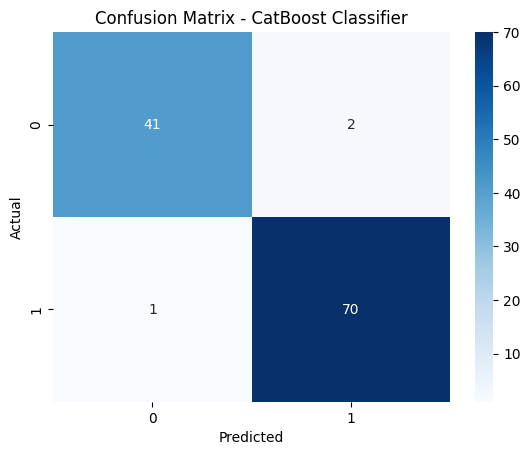

In [9]:
# Q-9. Write a Python program to:
#     ● Train a CatBoost Classifier
#     ● Plot the confusion matrix using `seaborn`

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=False
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.

      The dataset is imbalanced, contains missing values, and has both numeric and categorical features.
      
      Describe your step-by-step data science pipeline using boosting techniques:

          ● Data preprocessing & handling missing/categorical values
          ● Choice between AdaBoost, XGBoost, or CatBoost
          ● Hyperparameter tuning strategy
          ● Evaluation metrics you'd choose and why
          ● How the business would benefit from your model

    - **Data preprocessing**
      I would clean the data by handling missing values using median (numeric) and most-frequent or model-based imputation (categorical). Categorical features would be encoded using target encoding or handled natively by CatBoost. Class imbalance would be addressed using class weights or resampling techniques like SMOTE.

      **Model choice**
      I would prefer CatBoost because it natively handles categorical features, manages missing values well, and reduces overfitting using ordered boosting—ideal for mixed-type, imbalanced FinTech data.

      **Hyperparameter tuning**
      I would use GridSearchCV or RandomizedSearchCV to tune parameters like learning rate, depth, and number of estimators, with cross-validation to ensure stable performance

      **Evaluation metrics**
      I would focus on Precision, Recall, F1-score, and ROC-AUC rather than accuracy, since correctly identifying loan defaulters (minority class) is critical in imbalanced datasets.

      **Business impact**
      The model would reduce financial risk by accurately identifying high-risk customers, improve loan approval decisions, and help optimize profit while minimizing default losses.